# 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold

# 회귀
# 선형 회귀
from sklearn.linear_model import LinearRegression
# KNN 회귀
from sklearn.neighbors import KNeighborsRegressor
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 분류
# 로지스틱
from sklearn.linear_model import LogisticRegression
# LinearSVM
from sklearn.svm import LinearSVC
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 통계값 라이브러리
import statsmodels.api as sm
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# confusion matrix
# classification report
from sklearn.metrics import confusion_matrix, classification_report
# 히트맵을 위한 seaborn 세팅
import seaborn as sns

# 에러메세지
import warnings
warnings.filterwarnings(action='ignore')

# 파라미터 튜닝
# 그리드 서치 & 랜덤 서치
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# 폰트 설정

In [2]:
# 폰트 설정
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (14,16)

# 데이터 로드

In [ ]:
path = ""
df = pd.read_excel(path, sheet_name=0)
df

In [20]:
# 종속변수 생성 (labeling)
df['label'] = df.iloc[:,11:-1].sum(axis=1).map(lambda x: round(x/(72*5)*100, 2))

In [31]:
# 독립변수
x_data = df.iloc[:,11:-1]
x_data = x_data.fillna(0).astype(np.int32)

# 종속변수
y_data = df['label']

# EDA

In [37]:
# 종속변수 통계분포
y_data.describe()

count    38887.000000
mean        72.248368
std         16.427009
min         19.720000
25%         60.830000
50%         73.610000
75%         84.440000
max        100.000000
Name: label, dtype: float64

# 데이터 분리

In [38]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=0)

# 모델 생성

In [ ]:
linear = LinearRegression(n_jobs=-1).fit(train_x, train_y)
knn_reg = KNeighborsRegressor(n_neighbors=1, n_jobs=-1, metric='euclidean').fit(train_x, train_y)
tree_reg = DecisionTreeRegressor(random_state=1).fit(train_x, train_y)
forest_reg = RandomForestRegressor(n_jobs=-1, random_state=2).fit(train_x, train_y)
gbrt_reg = GradientBoostingRegressor(random_state=3).fit(train_x, train_y)

# Score 계산

## 사용 해볼만한 파라미터
- 선형회귀 : fit_intercept = True or False (Default:True) / normalize = True or False (Default:False)
- knn회귀 : n_neighbors = 1~10 / metirc = 'minkowski' or 'euclidean' (Default:minkowski) (minkowski == 맨하탄 과 유클리디언 일반화 한 방식)

### KNN 한계
- 수백 개 이상의 다양한 변수 특성을 가진 데이터 셋에는 잘 작동하지 않는다.
- 데이터 값이 0이 많은 데이터셋에는 잘 작동하지 않는다.

In [46]:
print('선형회귀 Train 정확도 : {:.2f}'.format(linear.score(train_x, train_y)))
print('선형회귀 Test 정확도 : {:.2f}'.format(linear.score(test_x, test_y)))
print('선형회귀 교차검증 정확도 : {:.2f}'.format(cross_val_score(linear, x_data, y_data).mean()))
print('-'*30)
print('KNN회귀 Train 정확도 : {:.2f}'.format(knn_reg.score(train_x, train_y)))
print('KNN회귀 Test 정확도 : {:.2f}'.format(knn_reg.score(test_x, test_y)))
print('KNN회귀 교차검증 정확도 : {:.2f}'.format(cross_val_score(knn_reg, x_data, y_data).mean()))
print('-'*30)
print('tree회귀 Train 정확도 : {:.2f}'.format(tree_reg.score(train_x, train_y)))
print('tree회귀 Test 정확도 : {:.2f}'.format(tree_reg.score(test_x, test_y)))
print('tree회귀 교차검증 정확도 : {:.2f}'.format(cross_val_score(tree_reg, x_data, y_data).mean()))
print('-'*30)
print('forest회귀 Train 정확도 : {:.2f}'.format(forest_reg.score(train_x, train_y)))
print('forest회귀 Test 정확도 : {:.2f}'.format(forest_reg.score(test_x, test_y)))
print('forest회귀 교차검증 정확도 : {:.2f}'.format(cross_val_score(forest_reg, x_data, y_data).mean()))
print('-'*30)
print('gbrt회귀 Train 정확도 : {:.2f}'.format(gbrt_reg.score(train_x, train_y)))
print('gbrt회귀 Test 정확도 : {:.2f}'.format(gbrt_reg.score(test_x, test_y)))
print('gbrt회귀 교차검증 정확도 : {:.2f}'.format(cross_val_score(gbrt_reg, x_data, y_data).mean()))
print('-'*30)

선형회귀 Train 정확도 : 1.00
선형회귀 Test 정확도 : 1.00
선형회귀 교차검증 정확도 : 1.00
------------------------------
KNN회귀 Train 정확도 : 1.00
KNN회귀 Test 정확도 : 0.98
KNN회귀 교차검증 정확도 : 0.98
------------------------------
tree회귀 Train 정확도 : 1.00
tree회귀 Test 정확도 : 0.93
tree회귀 교차검증 정확도 : 0.93
------------------------------
forest회귀 Train 정확도 : 1.00
forest회귀 Test 정확도 : 0.98
forest회귀 교차검증 정확도 : 0.98
------------------------------
gbrt회귀 Train 정확도 : 0.99
gbrt회귀 Test 정확도 : 0.99
gbrt회귀 교차검증 정확도 : 0.99
------------------------------


# 모델별 파라미터 튜닝

## KNN_Reg

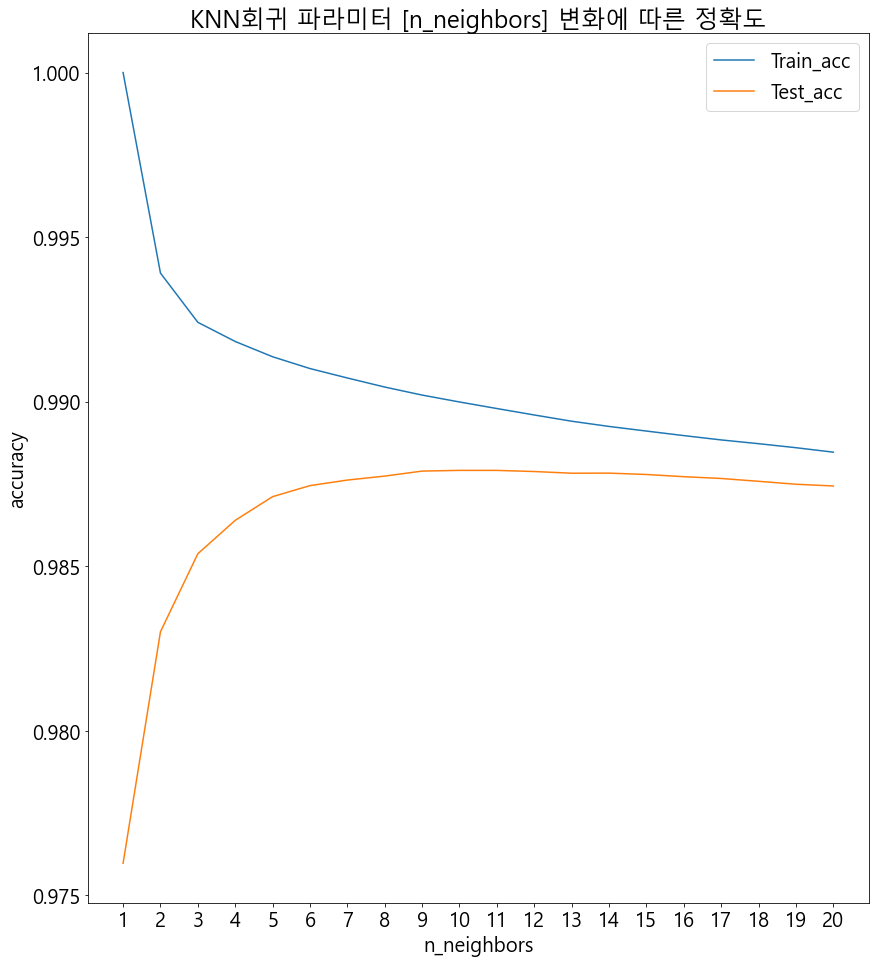

In [49]:
# n_neighbors 이웃 수 1 ~ 20

train_acc = []
test_acc = []

for n in range(1,21):
    clf = KNeighborsRegressor(n_neighbors=n, n_jobs=-1)
    clf.fit(train_x, train_y)
    train_acc.append(clf.score(train_x, train_y))
    test_acc.append(clf.score(test_x, test_y))

plt.plot(range(1,21), train_acc, label='Train_acc')
plt.plot(range(1,21), test_acc, label= 'Test_acc')
plt.legend()
plt.title('KNN회귀 파라미터 [n_neighbors] 변화에 따른 정확도')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(range(1,21))
plt.show()


## Decision Tree

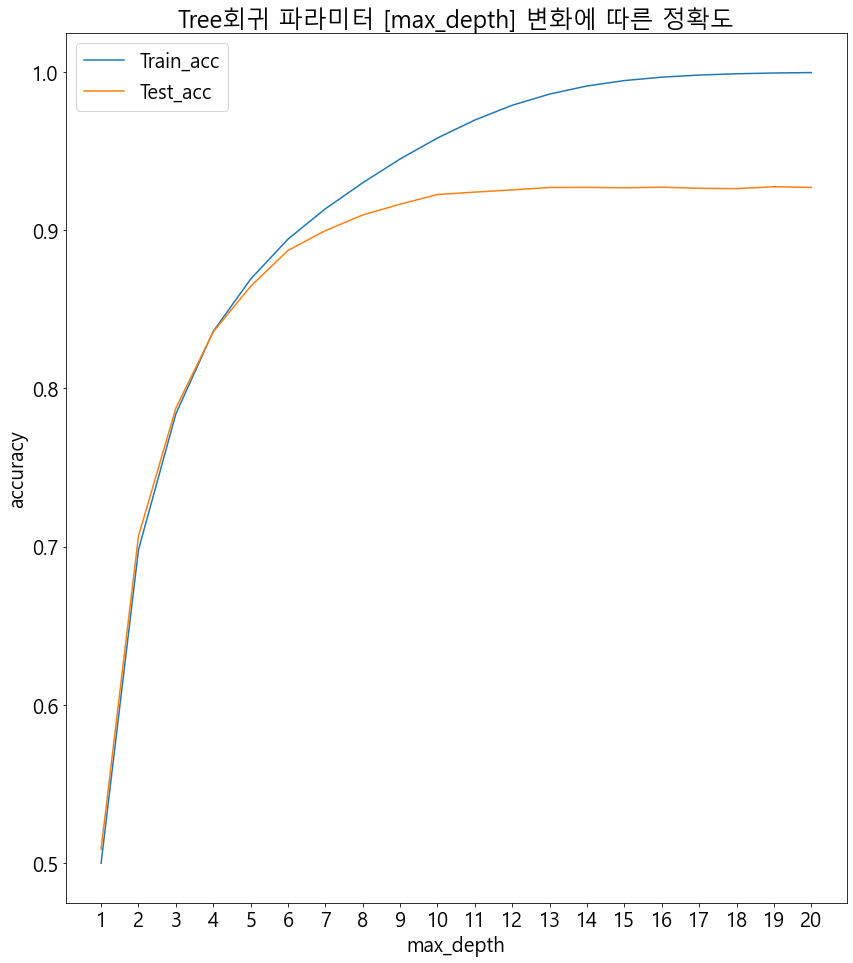

In [50]:
# max_depth 트리 깊이 1~20
train_acc = []
test_acc = []

for n in range(1,21):
    clf = DecisionTreeRegressor(max_depth=n)
    clf.fit(train_x, train_y)
    train_acc.append(clf.score(train_x, train_y))
    test_acc.append(clf.score(test_x, test_y))

plt.plot(range(1,21), train_acc, label='Train_acc')
plt.plot(range(1,21), test_acc, label= 'Test_acc')
plt.legend()
plt.title('Tree회귀 파라미터 [max_depth] 변화에 따른 정확도')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(range(1,21))
plt.show()

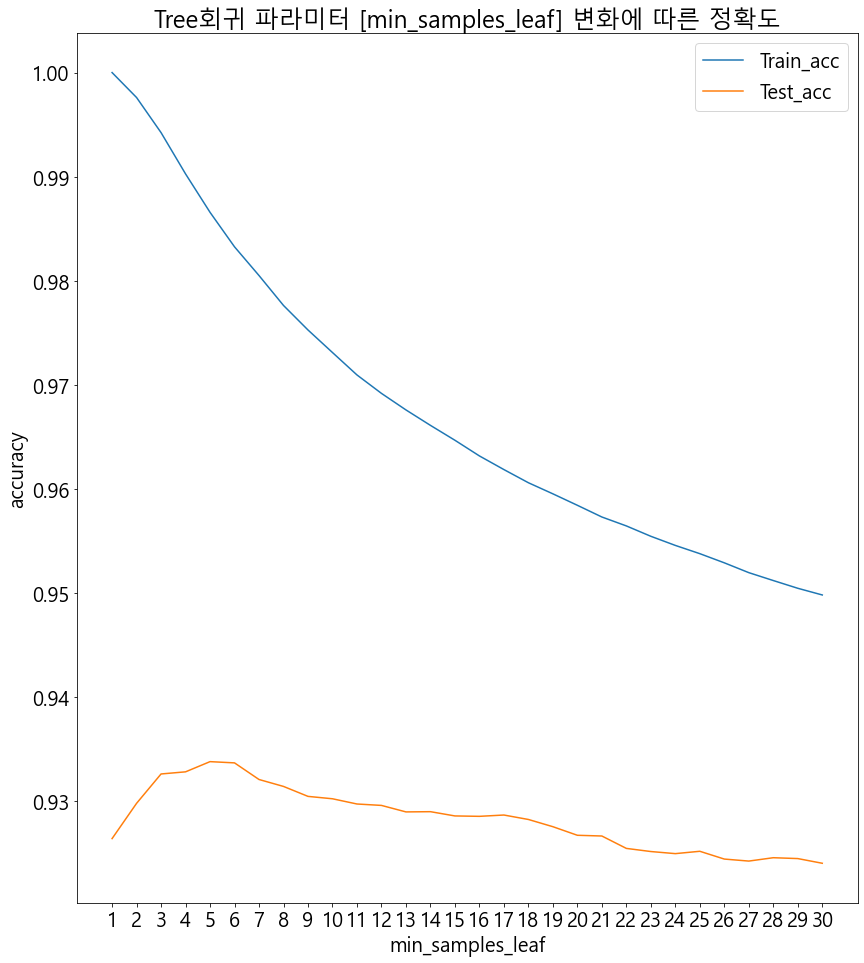

In [51]:
# min_samples_leaf 조절 1~30
train_acc = []
test_acc = []

for n in range(1,31):
    clf = DecisionTreeRegressor(min_samples_leaf=n)
    clf.fit(train_x, train_y)
    train_acc.append(clf.score(train_x, train_y))
    test_acc.append(clf.score(test_x, test_y))

plt.plot(range(1,31), train_acc, label='Train_acc')
plt.plot(range(1,31), test_acc, label= 'Test_acc')
plt.legend()
plt.title('Tree회귀 파라미터 [min_samples_leaf] 변화에 따른 정확도')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(range(1,31))
plt.show()

## Random Forest

## Gradient Boosting